In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *

In [3]:
from fastai.vision import *

In [4]:
from io import StringIO
import numpy as np
import os
from PIL import Image
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.pipeline import make_pipeline

In [5]:
from PIL import Image, ImageChops, ImageEnhance
import sys, os.path

In [6]:
import torch
torch.cuda.set_device(0)

In [7]:
path = '/home/FRACTAL/jitesh.arora/TRI_HACKATHON/Stage3/fakers/stage-3/stage3_image_data'

## Looking at the raw data

In [8]:

SEED =12
SZ =224
BS = 32
NUM_WORKERS = 50

data =   (ImageItemList.from_folder(f'{path}/train')
        .random_split_by_pct( 0.2 , seed = 12 )
        .label_from_folder()
        .add_test(ImageItemList.from_folder(f'{path}/test'))
        .transform(get_transforms(do_flip=True , max_zoom=1.0), size=SZ, resize_method=ResizeMethod.SQUISH)
        .databunch(bs = BS , num_workers = NUM_WORKERS, path = path)).normalize(imagenet_stats)

#ImageDataBunch.from_folder(path, valid_pct = 0.2, ds_tfms=tfms, size=112)


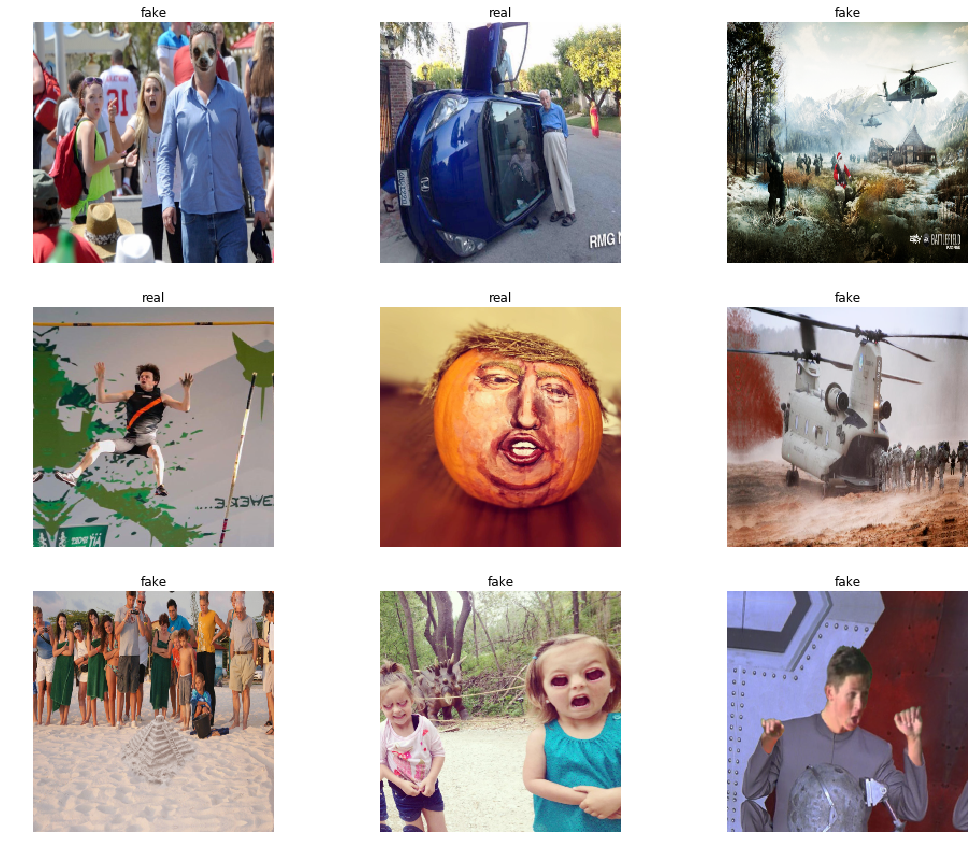

In [9]:
data.show_batch(rows=3 , figsize = (15 , 12) , seed = 12)

Motivated by http://fotoforensics.com/ we decided to tackle the problem of image tampering by observing Error Level Analysis (ELA) of both real and fake images. 
Used code from https://gist.github.com/ewencp/3356622 to create new Train and Test dataset with ELA of images.

###  Looking at ELA transformation of Images

In [10]:

SEED =12
SZ =224
BS = 32
NUM_WORKERS = 50

data =   (ImageItemList.from_folder(f'{path}/train_ela')
        .random_split_by_pct( 0.2 , seed = 12 )
        .label_from_folder()
        .add_test(ImageItemList.from_folder(f'{path}/test_ela'))
        .transform(get_transforms(do_flip=True , max_zoom=1.0), size=SZ, resize_method=ResizeMethod.SQUISH)
        .databunch(bs = BS , num_workers = NUM_WORKERS, path = path)).normalize(imagenet_stats)



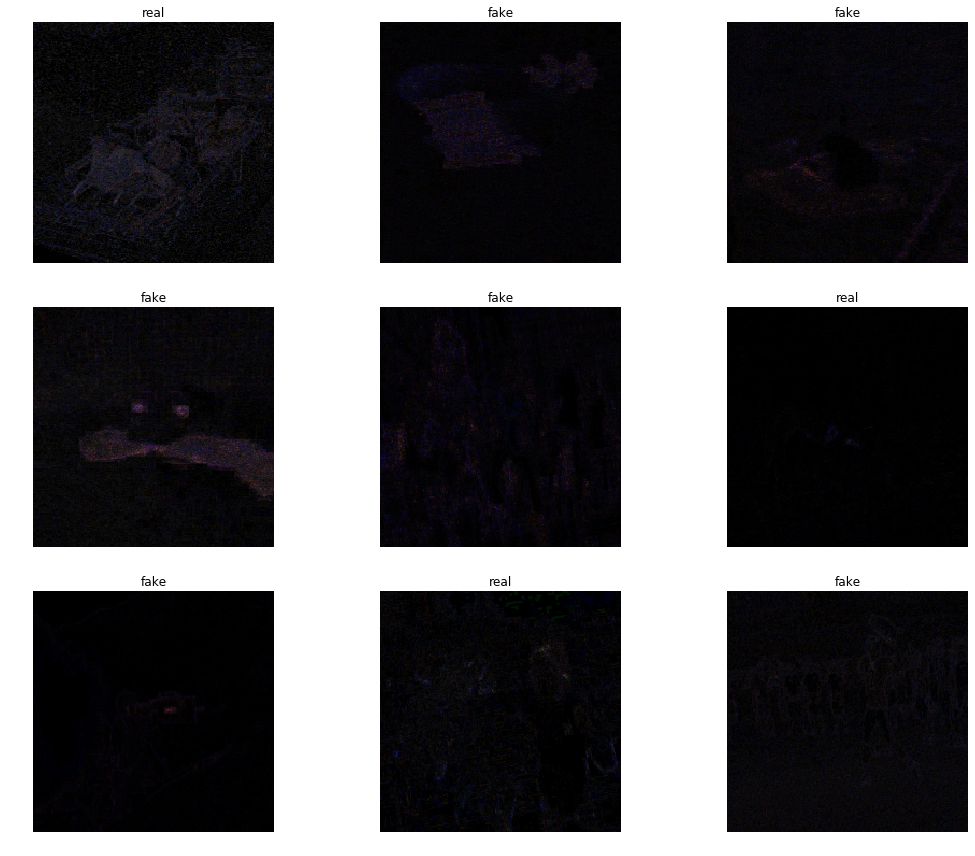

In [11]:
data.show_batch(rows=3 , figsize = (15 , 12))

Error Level Analysis(ELA) exploits the lossy compression of JPEG images. For real images only boundary area have certain noise pattern while for fake images we have more white noise and blobby regions.  

We will train ReNet101 on both original dataset and ELA transformed dataset.